INITIAL DATASET AUDIT
------------------------------
Total Categories: 31
Duplicate IDs: 0

NULL VALUES FOUND:
id                0
category_title    0
dtype: int64

POST-CLEANING SUMMARY
------------------------------
Cleaned Mapping Records: 31


/tmp/ipykernel_687/1206205587.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='id', y='category_title', data=df_cat, palette='viridis')



CLEANED DATASET PREVIEW:
 id   category_title
  1 Film & Animation
  2 Autos & Vehicles
 10            Music
 15   Pets & Animals
 17           Sports
 18     Short Movies
 19  Travel & Events
 20           Gaming
 21    Videoblogging
 22   People & Blogs


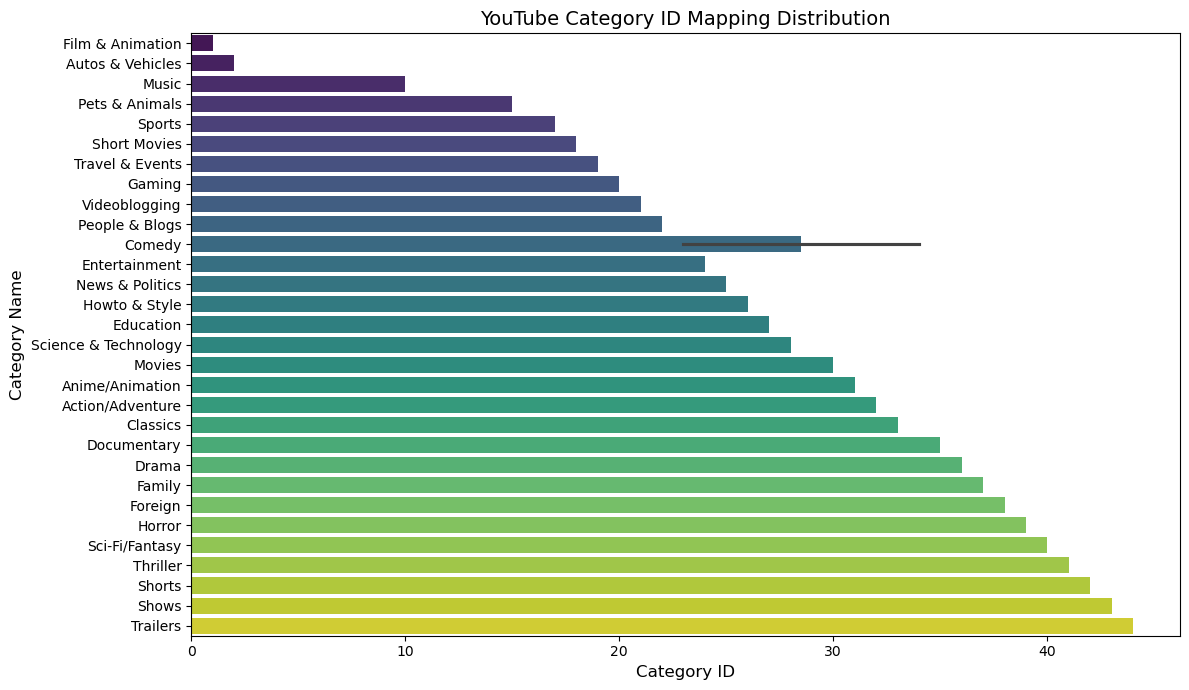

In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load and Flatten JSON
with open('CA_category_id.json', 'r') as f:
    data = json.load(f)

category_list = []
for item in data['items']:
    category_list.append({
        'id': int(item['id']),
        'category_title': item['snippet']['title']
    })

df_cat = pd.DataFrame(category_list).sort_values('id').reset_index(drop=True)

# ANSI Colors for Output
BLUE = '\033[94m\033[1m'
GREEN = '\033[92m\033[1m'
RED = '\033[91m\033[1m'
END = '\033[0m'

# --- DATASET AUDIT ---
print(f"{BLUE}INITIAL DATASET AUDIT{END}")
print("-" * 30)
print(f"Total Categories: {len(df_cat)}")
print(f"Duplicate IDs: {df_cat['id'].duplicated().sum()}")
print(f"\n{RED}NULL VALUES FOUND:{END}")
print(df_cat.isnull().sum())

# --- CLEANING PROCESS ---
df_cat.drop_duplicates(subset=['id'], inplace=True)

# --- FINAL RESULTS & VISUALIZATION ---
print("\n" + f"{GREEN}POST-CLEANING SUMMARY{END}")
print("-" * 30)
print(f"Cleaned Mapping Records: {len(df_cat)}")

# Visual Summary: Plotting Categories by their IDs
plt.figure(figsize=(12, 7))
sns.barplot(x='id', y='category_title', data=df_cat, palette='viridis')
plt.title('YouTube Category ID Mapping Distribution', fontsize=14)
plt.xlabel('Category ID', fontsize=12)
plt.ylabel('Category Name', fontsize=12)
plt.tight_layout()
plt.savefig('category_visual_summary.png')

# Clean Preview
print(f"\n{BLUE}CLEANED DATASET PREVIEW:{END}")
print(df_cat.head(10).to_string(index=False))

# Export
df_cat.to_csv('Cleaned_YouTube_Categories.csv', index=False)